<div style="font-size:25pt">TWEEPY</div>

interesting functions:<br>
https://www.programcreek.com/python/example/76301/tweepy.Cursor

# Imports

In [1]:
import tweepy
import pandas as pd
from tweepy.cursor import Cursor
from NLPprojects.utils import text_cleaner
from NLPprojects.tweeter_utils import *
from NLPprojects.textblob_utils import *

# Connect to Twitter

In [2]:
api = tweeter_authenticate()

# Getting Tweets from a specific user

In [3]:
df = get_tweets_from_username(api, "BarackObama")

Getting tweets before 1337509978454810625
... 400 tweets downloaded so far
Getting tweets before 1275103999474229248
... 600 tweets downloaded so far
Getting tweets before 1157016227681918980
... 800 tweets downloaded so far
Getting tweets before 932685522820042753
... 1000 tweets downloaded so far
Getting tweets before 778315562623438847
... 1200 tweets downloaded so far
Getting tweets before 753702652060442623
... 1400 tweets downloaded so far
Getting tweets before 727920792684519423
... 1600 tweets downloaded so far
Getting tweets before 706878103373516799
... 1800 tweets downloaded so far
Getting tweets before 687102701260242944
... 2000 tweets downloaded so far
Getting tweets before 671131539036577792
... 2200 tweets downloaded so far
Getting tweets before 649349588185280511
... 2400 tweets downloaded so far
Getting tweets before 628970265125371903
... 2600 tweets downloaded so far
Getting tweets before 616626393720291329
... 2800 tweets downloaded so far
Getting tweets before 600

In [4]:
df["full_text"][0:10]

0    Right now, thousands of people in Haiti are in...
1    Tomorrow is the last day to sign up for health...
2    We’re at a turning point in the redistricting ...
3    RT @POTUS: We can’t wait to tackle the climate...
4    Congress needs to summon the same courage we s...
5    The Voting Rights Act, signed into law 56 year...
6    From the coal mines of Pennsylvania to the hal...
7    RT @ObamaFoundation: Happy birthday, Mrs. Robi...
8    One of the things I’ve always loved about bask...
9    COVID-19 has gotten more contagious, so it’s m...
Name: full_text, dtype: object

# Clean Tweets

In [5]:
df["cleanText"] = df["full_text"]
cleaner = text_cleaner(df = df, label="cleanText")

In [6]:
cleaned_df = cleaner.clean_texts()

In [8]:
cleaned_df[["full_text", "cleanText"]]

,full_text,cleanText
0,"Right now, thousands of people in Haiti are in...",right thousand people haiti injure even homele...
1,Tomorrow is the last day to sign up for health...,tomorrow last day sign health insurance specia...
2,We’re at a turning point in the redistricting ...,turn point redistricting process map draw next...
3,RT @POTUS: We can’t wait to tackle the climate...,cant wait tackle climate crisis sign unmistak...
4,Congress needs to summon the same courage we s...,congress need summon courage saw half century ...
...,...,...
3241,"""I still believe we are one people. I still be...",still believe one people still believe togeth...
3242,"""I know how tempting such cynicism may be. But...",know tempt cynicism may still think cynic wro...
3243,"""Leading — always — with the example of our va...",leadingalwayswith example value thats make ex...
3244,"""I will not let this Congress endanger the hea...",let congress endanger health child turn back ...


# Plot number of tweets per day recently

In [9]:
cleaned_df["created_at"] = cleaned_df["created_at"].apply(pd.to_datetime)
cleaned_df.sort_values(by="created_at", inplace=True)
cleaned_df["created_at"] = cleaned_df["created_at"].apply(lambda x: x.strftime("%Y/%m/%d"))

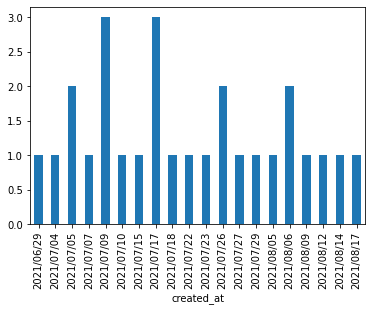

In [10]:
cleaned_df.groupby("created_at").count()["id_str"][-20:].plot(kind="bar");

# Plot Tweets from a specific day

In [14]:
k=0
for text in cleaned_df[cleaned_df["created_at"] == "2021/08/06"].reset_index(drop=True)["cleanText"]:
    k+=1
    print(str(k) + ")" + text + "\n")

1)vote right act sign law year ago today monumental piece legislation supreme court state legislature make hard cast ballot cant take vote right grant 

2)congress need summon courage saw half century ago vote right act pass guarantee every american voice vote 



# Plot word cloud

In [15]:
cleaned_df = add_subjectivity_and_polarity(cleaned_df, label="cleanText")

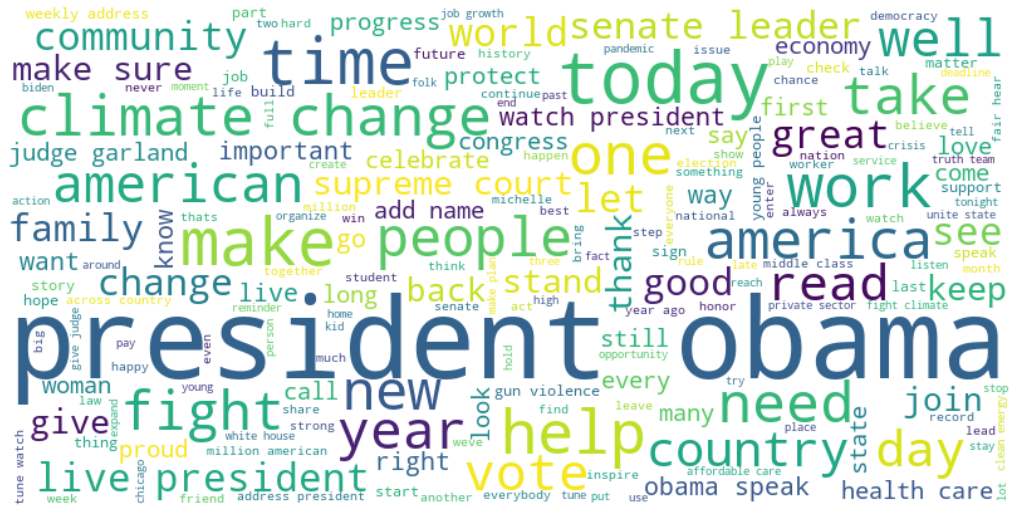

In [17]:
plot_wordcloud(cleaned_df, label="cleanText")

# Calculate Tweets overall sentiment with TextBlob

In [18]:
cleaned_df = add_textblob_analysis(cleaned_df)

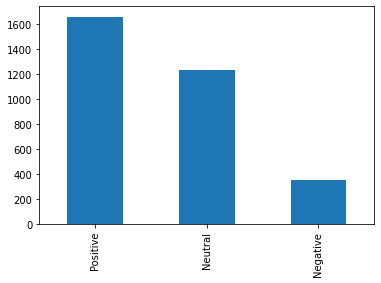

In [19]:
cleaned_df["textblob_analysis"].value_counts().plot(kind="bar");

# Getting Tweets from a hashtag

In [ ]:
df_searched = get_tweets_from_search(api, "plastic", parameters=" -filter:retweets", since="2021-08-09", lang="en", max_tweets=1000)

In [231]:
df_searched

,text
0,@Konna_Carmine Thanks boyo. This is probably m...
1,Once upon a time Park Jinyoung. Was in his dre...
2,Thanks to @scottishgreens every house is to re...
3,"Each year, the world produces 300 million tons..."
4,@GregorRoberts0n 🙄🤮. Plastic club
...,...
995,"He’s diabolical, he got plastic surgery to imp..."
996,@MissySpr I hope it's a roll of plastic and du...
997,@SsharonSscott This one wasn't paper but it wa...
998,@dcfc_live Plastic pundit is Richards. Only on...


# Clean texts

In [232]:
df_searched["cleanText"] = df_searched["text"]
cleaner_searched = text_cleaner(df = df_searched, label="cleanText", included_sw=["amp"])
cleaned_df_searched = cleaner_searched.clean_texts()
cleaned_df_searched.sample()

,text,cleanText,vocabulary_richness
524,The #recycling myth: What actually happens to ...,myth actually happen plastic,1.0


# Add subjectivity and polarity

In [233]:
cleaned_df_searched = add_subjectivity_and_polarity(cleaned_df_searched, label="cleanText")
cleaned_df_searched.sample(5)

,text,cleanText,vocabulary_richness,subjectivity,polarity
734,I could have supported the most successful clu...,could support successful club like boy back pi...,0.947368,0.330000,0.350000
74,"Well folks, I just tried making caramel for th...",well folk try make caramel first time transfer...,0.863636,0.166667,0.027778
787,@lateriser12 Is this just a content creator th...,content creator thing guy follow hundred acco...,0.916667,0.000000,0.000000
702,"Awrite 'plastic' progressive, flexing for raci...",awrite plastic progressive flex racist flaunt ...,1.000000,0.000000,0.000000
741,I BOUGHT AN ID HOLDER LIKE A HARD PLASTIC ONE ...,buy holder like hard plastic one break sometim...,0.882353,0.320833,-0.195833


# Plot wordcloud

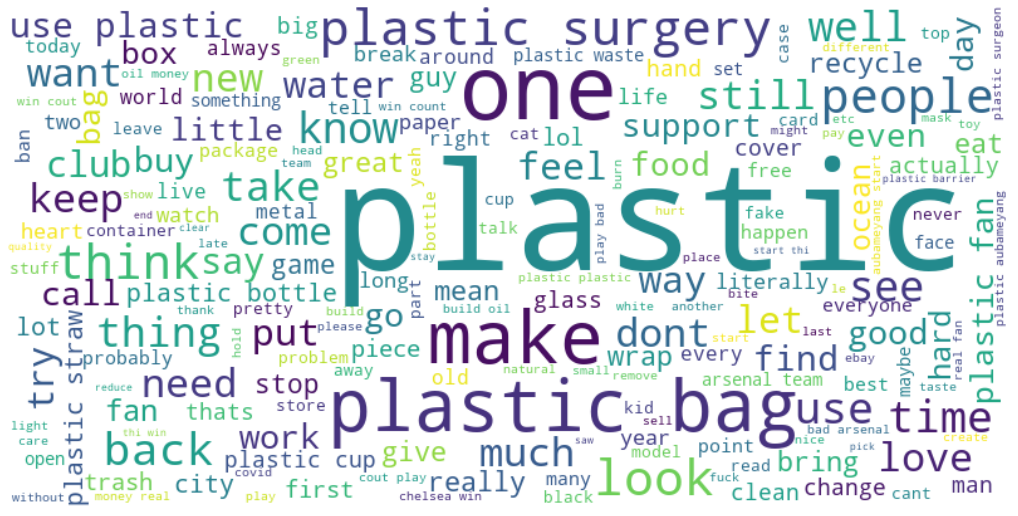

In [234]:
plot_wordcloud(cleaned_df_searched, label="cleanText")

# Calculate overall sentiment of tweets

In [235]:
cleaned_df_searched = add_textblob_analysis(cleaned_df_searched)

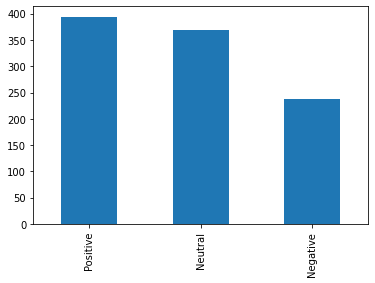

In [236]:
cleaned_df_searched["textblob_analysis"].value_counts().plot(kind="bar");